# Chapter 1 - DSGE

Problem 1

Let $K_{t+1} = Ae^{z_t}{K_t}^\alpha$. Substituting in the Euler Equation, we have 

$$ \frac{1}{e^{z_t}{K_t}^\alpha - K_{t+1}} = \beta E_t (\frac{\alpha e^{z_{t+1}}K_{t+1}^{\alpha-1}}{e^{z_{t+1}}K_{t+1}^\alpha - K_{t+2}})$$

$$ \Rightarrow \frac{1}{(1-A)e^{z_t}K_t^{\alpha}} = \beta E_t (\frac{\alpha}{(1-A)K_{t+1}})$$
$$\Rightarrow \frac{1}{(1-A)e^{z_t}K_t^{\alpha}} = \beta E_t (\frac{\alpha}{(1-A)Ae^{z_t}{K_t}})$$
Since the terms on the RHS are at time $t$, we can remove the expectation operator.
$$\Rightarrow \frac{1}{(1-A)e^{z_t}K_t^{\alpha}} = \frac{\alpha\beta}{A(1-A)e^{z_t}K_t^{\alpha}}$$
$$\Rightarrow A = \alpha\beta$$
The policy function is $K_{t+1} = \alpha\beta e^{z_t}{K_t}^\alpha$

Problem 2

The characterizing equations are 
$$c_t = (1-\tau)(w_t l_t + (r_t - \delta)k_t) + k_t + T_t - k_{t+1}$$

$$\frac{1}{c_t}= \beta E_t(\frac{1}{c_{t+1}}((r_{t+1}-\delta)(1-\tau))+1)$$

$$ \frac{a}{1-l_t}= \frac{1}{c_t}w_t(1-\tau)$$

$$r_t = \alpha e^{z_t}(\frac{L_t}{K_t})^{1-\alpha}$$

$$w_t = (1-\alpha)e^{z_t}(\frac{K_t}{L_t})^\alpha$$

$$\tau (w_t l_t + (r_t - \delta)k_t) = T_t$$

$$z_t = (1-\rho_z)\bar{z} + \rho_z z_{t-1} + \epsilon^z_t$$

We cannot use the tricks of Problem to obtain an analytical solution for the policy function as the terms do not cancel out accordingly. 

Problem 3

The characterizing equations are

$$ c_t = (1-\tau)(w_t l_t + (r_t - \delta)k_t) + k_t + T_t - k_{t+1} $$ 

$$ c_t^{-\gamma} = \beta E_t (c_{t+1}^{-\gamma}(r_{t+1} - \delta)(1 - \tau)+1)$$

$$ \frac{a}{1-l_t} = c_t^{-\gamma}(1-\tau)w_t$$ 

$$r_t = \alpha e^{z_t}(\frac{L_t}{K_t})^{1-\alpha}$$

$$w_t = (1-\alpha)e^{z_t}(\frac{K_t}{L_t})^\alpha$$

$$\tau (w_t l_t + (r_t - \delta)k_t) = T_t$$

$$z_t = (1-\rho_z)\bar{z} + \rho_z z_{t-1} + \epsilon^z_t$$



Problem 4

The characterizing equations are 

$$ c_t = (1-\tau)(w_t l_t + (r_t - \delta)k_t) + k_t + T_t - k_{t+1} $$ 

$$ c_t^{-\gamma} = \beta E_t (c_{t+1}^{-\gamma}(r_{t+1} - \delta)(1 - \tau)+1)$$

$$ \frac{-a}{(1-l_t)^t} = c_t^{-\gamma}(1-\tau)w_t $$

$$r_t = \alpha e^{z_t} K_t^{\eta -1}(\alpha K_t ^\eta + (1-\alpha)L_t^\eta)^{\frac{1-\eta}{\eta}}$$

$$w_t = (1-\alpha)e^{z_t}L_t^{\eta-1}(\alpha K_t ^ \eta + (1-\alpha)L_t)^\eta$$

$$\tau (w_t l_t + (r_t - \delta)k_t) = T_t$$

$$z_t = (1-\rho_z)\bar{z} + \rho_z z_{t-1} + \epsilon^z_t$$


Problem 5

The characterising equations are 

$$ c_t = (1-\tau)(w_t l_t + (r_t - \delta)k_t) + k_t + T_t - k_{t+1} $$ 

$$ c_t^{-\gamma} = \beta E_t (c_{t+1}^{-\gamma}(r_{t+1} - \delta)(1 - \tau)+1)$$

$$ r_t = \alpha A_t (\frac{L_t}{K_t})^{1-\alpha}$$ where $A_t = e^{z_t(1-\alpha)}$

$$w_t = (1-\alpha)A_t(\frac{K_t}{L_t})^{\alpha}$$

$$\tau (w_t l_t + (r_t - \delta)k_t) = T_t$$

$$z_t = (1-\rho_z)\bar{z} + \rho_z z_{t-1} + \epsilon^z_t$$

The algebraic steady state solution can be obtained by plugging in steady state values into the second equation i.e the Euler Equation for consumption. We note that in steady state, the expectation operator is also removed as the values are not changing. At steady state $\bar{A} = 1$. Thus,

$$ 1 = \beta((\bar{r} - \delta)(1-\tau)+1)$$

Plugging in the values of $\bar{r}$ from the steady state version of $r_t$, we have

$$\alpha \bar{K}^{\alpha-1} = \frac {1-\beta}{\beta(1-\tau)}+\delta$$



In [3]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import namedtuple
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve


In [5]:
gamma  = 2.5
beta = 0.98
alpha = 0.40
delta = 0.10
z_bar = 0
tau = 0.05

def get_A(z_bar, alpha):
    A = np.exp(z_bar*(1-alpha))
    return A

def get_c(tau, w, r, delta, k, T):
    c = (1-tau)*(w + (r-delta)*k) + T
    return c

def get_r(alpha, z_bar, k):
    A = get_A(z_bar, alpha)
    r = alpha*A*k**(alpha-1)
    return r

def get_w(alpha, z_bar, k):
    A = get_A(z_bar, alpha)
    w = (1-alpha)*A*k
    return w

def get_T(tau, w, r, delta, k):
    T = tau*(w + (r-delta)*k)
    return T

def euler(k, *args):
    (alpha, z_bar, tau, delta, gamma, beta) = args
    r = get_r(alpha, z_bar, k)
    w = get_w(alpha, z_bar, k)
    T = get_T(tau, w, r, delta, k)
    c = get_c(tau, w, r, delta, k, T)
    errors = c**(-gamma) - beta*((c**(-gamma))*((r- delta)*(1-tau)+1))
    return errors

def get_Y(A,K,alpha):
    Y = A*K**alpha
    return Y
    
k_init = 0.7
eul_args = (alpha, z_bar, tau, delta, gamma, beta)
results = opt.root(euler, k_init, args= (eul_args), tol = 1e-14)
k_ss = results.x
error = results.fun
A = get_A(z_bar, alpha)
Y = get_Y(A, k_ss, alpha)
r = get_r(alpha, z_bar, k_ss)
w = get_w(alpha, z_bar, k_ss)
T = get_T(tau, w, r, delta, k_ss)
c = get_c(tau, w, r, delta, k_ss, T)
print('A: ', A,'GDP: ', Y,'Interest rate: ',r, 'Wage rate: ', w,'Tax Revenue: ', T, 'Consumption: ', c, 'Capital: ', k_ss)


A:  1.0 GDP:  [2.21325461] Interest rate:  [0.12148228] Wage rate:  [4.37249877] Tax Revenue:  [0.22645254] Consumption:  [4.52905082] Capital:  [7.28749795]


The values of $\bar{K}$ are the same analytically and algebraically. 

Problem 6

The characteristic equations are 

$$ c_t = (1-\tau)(w_t l_t + (r_t - \delta)k_t) + k_t + T_t - k_{t+1} $$ 

$$ c_t^{-\gamma} = \beta E_t (c_{t+1}^{-\gamma}(r_{t+1} - \delta)(1 - \tau)+1)$$

$$ a(1-l_t)^{-\zeta} = c_t^{-\gamma} w_t (1-\tau)$$

$$ r_t = \alpha A_t (\frac{L_t}{K_t})^{1-\alpha}$$ where $A_t = e^{z_t(1-\alpha)}$

$$w_t = (1-\alpha)A_t(\frac{K_t}{L_t})^{\alpha}$$

$$\tau (w_t l_t + (r_t - \delta)k_t) = T_t$$

$$z_t = (1-\rho_z)\bar{z} + \rho_z z_{t-1} + \epsilon^z_t$$



In [11]:
gamma  = 2.5
zeta = 1.5
beta = 0.98
alpha = 0.40
delta = 0.10
z_bar = 0
tau = 0.05
a = 0.5

def get_A(z_bar, alpha):
    A = np.exp(z_bar*(1-alpha))
    return A

def get_c(tau, w, r, delta, k, T, l):
    c = (1-tau)*(w*l + (r-delta)*k) + T
    return c

def get_r(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    r = alpha*A*(l/k)**(1-alpha)
    return r

def get_w(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    w = (1-alpha)*A*(k/l)**alpha
    return w

def get_T(tau, w, r, delta, k, l):
    T = tau*(w*l + (r-delta)*k)
    return T

def euler(klvec, *args):
    (alpha, z_bar, tau, delta, gamma, beta, a, zeta) = args
    k = klvec[0]
    l = klvec[1]
    r = get_r(alpha, z_bar, k,l)
    w = get_w(alpha, z_bar, k,l)
    T = get_T(tau, w, r, delta, k,l)
    c = get_c(tau, w, r, delta, k, T,l)
    error1 = c**(-gamma) - beta*((c**(-gamma))*((r- delta)*(1-tau)+1))
    error2 = c**(-gamma)*w*(1-tau)- a*(1-l)**(-zeta)  
    errors = np.array([error1, error2])
    return errors

def get_Y(alpha, z_bar, k,l):
    A = get_A(z_bar,alpha)
    Y = A*(k**alpha)*l**(1-alpha)
    return Y

klvec_init = np.array([0.5,0.5])
eul_args = (alpha, z_bar, tau, delta, gamma, beta, a, zeta)
results = opt.root(euler, klvec_init, args= (eul_args), tol = 1e-14)
klvec_ss = results.x
errors = results.fun
k_ss = klvec_ss[0]
l_ss = klvec_ss[1]
Y = get_Y(alpha, z_bar, k_ss, l_ss)
r = get_r(alpha, z_bar, k_ss, l_ss)
w = get_w(alpha, z_bar, k_ss, l_ss)
T = get_T(tau, w, r, delta, k_ss, l_ss)
C = get_c(tau, w, r, delta, k_ss, T, l_ss)
print('Steady State capital:', k_ss, 'Steady State Labour: ',l_ss,'GDP: ', Y,'Steady State Interest Rate:', r,
      'Steady State Wage: ', w, 'Steady State Tax Revenue: ', T, 'Steady State consumption: ',C)



Steady State capital: 4.225229026783866 Steady State Labour:  0.5797914531670062 GDP:  1.2832261088325871 Steady State Interest Rate: 0.1214822771213749 Steady State Wage:  1.3279527683513055 Steady State Tax Revenue:  0.04303516030771001 Steady State consumption:  0.8607032061542003


# Chapter 2 - Linearization

Problem 1

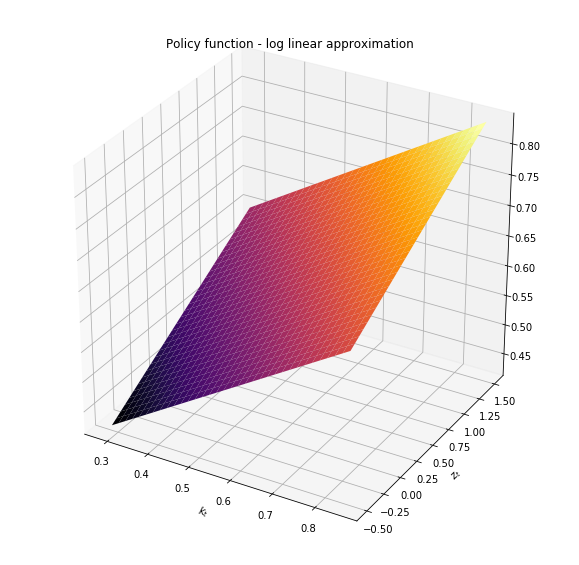

In [10]:
#Setting Parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_params():
    k_bar = A**(1/1-alpha)
    F = 1/((k_bar**alpha-1)-1)
    G = (alpha + k_bar)/(k_bar - k_bar**alpha)
    H = alpha/(1-k_bar**(1-alpha))
    L = k_bar/(k_bar - k_bar**alpha)
    M = 1/(1-k_bar**(1-alpha))
    N = rho
    return F,G,H,L,M,N

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coefficients():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coefficients()
k_bar = A**(1/1-alpha)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation')
plt.ylabel('$z_t$')
plt.xlabel('$k_t$')
plt.show()
        


Problem 2

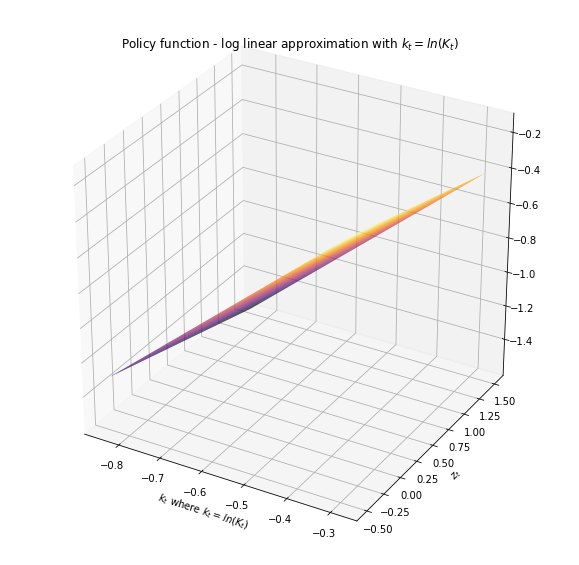

In [15]:
#Setting Parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_params():
    K_bar = A**(1/1-alpha)
    k_bar = np.log(K_bar)
    F = k_bar/(np.exp(alpha*k_bar)- np.exp(k_bar))
    G = k_bar*(alpha + np.exp((alpha-1)*k_bar))/(1- np.exp((alpha-1)*k_bar))
    H = (k_bar*alpha*np.exp(alpha*k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    L = -(np.exp(k_bar))/(np.exp(alpha*k_bar) - np.exp(k_bar))
    M = (np.exp(alpha*k_bar))/(np.exp(alpha*k_bar)- np.exp(k_bar))
    N = rho
    return F,G,H,L,M,N 

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coefficients():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coefficients()
K_bar = A**(1/1-alpha)
k_bar = np.log(K_bar)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation with $k_t = ln(K_t)$')
plt.ylabel('$z_t$')
plt.xlabel('$k_t$ where $k_t = ln(K_t)$')
plt.show()


Problem 3

$$E_t (F\tilde{X_{t+1}} + G\tilde{X_{t}} + H\tilde{X_{t-1}} + L\tilde{Z_{t+1}} + M\tilde{Z_{t}})= 0 $$

$$\tilde{Z_{t}} = N\tilde{Z_{t-1}} + \epsilon_t$$

$$\tilde{X_t} = P\tilde{X_{t-1}} + Q\tilde{Z_t}$$

$$E_t[F(P\tilde{X_t}+Q\tilde{Z_{t+1}}) +G(P\tilde{X_{t-1}} + Q\tilde{Z_t}) + H\tilde{X_{t-1}} +  L\tilde{Z_{t+1}} + M\tilde{Z_{t}}] = 0$$

Plugging in $Z_{t+1}$, taking common terms and noting that $E_t(\epsilon_{t+1}) = 0$ as well as noting that expectation operator goes away for all the other time periods, we get:

$$(FPP + GP + H)\tilde{X_{t-1}} + (FPQ + FQN + GQ + LN + M)\tilde{Z_t} = 0$$

Which gives the result.



Problems 4 and 5

In [11]:
gamma  = 2.5
zeta = 1.5
beta = 0.98
alpha = 0.40
delta = 0.10
z_bar = 0
tau = 0.05
a = 0.5

def get_A(z_bar, alpha):
    A = np.exp(z_bar*(1-alpha))
    return A

def get_c(tau, w, r, delta, k, T, l):
    c = (1-tau)*(w*l + (r-delta)*k) + T
    return c

def get_r(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    r = alpha*A*(l/k)**(1-alpha)
    return r

def get_w(alpha, z_bar, k, l):
    A = get_A(z_bar, alpha)
    w = (1-alpha)*A*(k/l)**alpha
    return w

def get_T(tau, w, r, delta, k, l):
    T = tau*(w*l + (r-delta)*k)
    return T

def euler(klvec, *args):
    (alpha, z_bar, tau, delta, gamma, beta, a, zeta) = args
    k = klvec[0]
    l = klvec[1]
    r = get_r(alpha, z_bar, k,l)
    w = get_w(alpha, z_bar, k,l)
    T = get_T(tau, w, r, delta, k,l)
    c = get_c(tau, w, r, delta, k, T,l)
    error1 = c**(-gamma) - beta*((c**(-gamma))*((r- delta)*(1-tau)+1))
    error2 = c**(-gamma)*w*(1-tau)- a*(1-l)**(-zeta)  
    errors = np.array([error1, error2])
    return errors

def get_Y(alpha, z_bar, k,l):
    A = get_A(z_bar,alpha)
    Y = A*(k**alpha)*l**(1-alpha)
    return Y

def get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta):
    klvec_init = np.array([0.5,0.5])
    eul_args = (alpha, z_bar, tau, delta, gamma, beta, a, zeta)
    results = opt.root(euler, klvec_init, args= (eul_args), tol = 1e-14)
    klvec_ss = results.x
    errors = results.fun
    k_ss = klvec_ss[0]
    l_ss = klvec_ss[1]
    Y = get_Y(alpha, z_bar, k_ss, l_ss)
    r = get_r(alpha, z_bar, k_ss, l_ss)
    w = get_w(alpha, z_bar, k_ss, l_ss)
    T = get_T(tau, w, r, delta, k_ss, l_ss)
    C = get_c(tau, w, r, delta, k_ss, T, l_ss)
    I = delta*k_ss
    return k_ss, C, r, w, l_ss, T, Y, I

derivative = np.empty((8, 8))
epsilon = 1e-4

#Set slightly perturbed parameters
gamma_p  = gamma+epsilon
zeta_p = zeta + epsilon
beta_p = beta + epsilon
alpha_p = alpha + epsilon
delta_p = delta + epsilon
z_bar_p = z_bar + epsilon
tau_p = tau + epsilon
a_p = a + epsilon

# Start filling the matrix with perturbed steady states
derivative[0,:] = get_ss(alpha, z_bar, tau, delta_p, gamma, beta, a, zeta)
derivative[1,:] = get_ss(alpha, z_bar, tau_p, delta, gamma, beta, a, zeta)
derivative[2,:] = get_ss(alpha, z_bar_p, tau, delta, gamma, beta, a, zeta)
derivative[3,:] = get_ss(alpha_p, z_bar, tau, delta, gamma, beta, a, zeta)
derivative[4,:] = get_ss(alpha, z_bar, tau, delta, gamma_p, beta, a, zeta)
derivative[5,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta_p)
derivative[6,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta_p, a, zeta)
derivative[7,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a_p, zeta)

#create another matrix with original values of steady states i.e with original parameters
matrix = np.empty((8,8))
for i in range(8):
    matrix[i,:] = get_ss(alpha, z_bar, tau, delta, gamma, beta, a, zeta)

#derivative is difference in steady state values/epsilon 
derivative = (derivative - matrix)/epsilon
derivative

array([[-4.83042378e+01, -3.50925032e+00,  1.00000000e+00,
        -7.28250259e+00,  1.31911929e+00, -1.75462516e-01,
        -4.11927550e+00, -6.10025176e-01],
       [-2.32335242e+00, -2.34406155e-01,  2.26153038e-02,
        -1.64806424e-01, -1.38930975e-01,  8.48959458e-01,
        -4.66741397e-01, -2.32335242e-01],
       [ 2.83835879e+00,  5.78189844e-01,  0.00000000e+00,
         1.32801917e+00, -1.90318105e-01,  2.89094922e-02,
         8.62025723e-01,  2.83835879e-01],
       [ 2.59941586e+01,  2.08592149e+00,  2.22044605e-12,
         4.39780036e+00, -7.69576204e-01,  1.04296074e-01,
         4.68533735e+00,  2.59941586e+00],
       [ 1.38696175e-01,  2.82532004e-02, -1.11022302e-12,
         6.66133815e-12,  1.90320705e-02,  1.41266002e-03,
         4.21228179e-02,  1.38696175e-02],
       [-8.01632142e-01, -1.63297031e-01, -2.35922393e-12,
         1.77635684e-11, -1.10001011e-01, -8.16485154e-03,
        -2.43460245e-01, -8.01632142e-02],
       [ 6.55108813e+01,  1.750679

Problem 6

In [3]:
params = ["a", "alpha", "beta", "delta", "gamma", "rho", "sigma", "tau", "xi"]
BaselineModel = namedtuple("BaselineModel", params)
m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)

def u(m, c, l):
    uc = (c**(1.0 - m.gamma) - 1.0) / (1.0 - m.gamma)
    ul = m.a * ((1.0 - l)**(1.0 - m.xi) - 1.0) / (1.0 - m.xi)
    return uc + ul

def du_dc(m, c, l):
    return c**(-m.gamma)

def du_dl(m, c, l):
    return - m.a * (1.0 - l)**(-m.xi)

def f(m, k, l, z):
    return k**m.alpha * (l * np.exp(z))**(1.0 - m.alpha)

def df_dk(m, k, l, z):
    return m.alpha * (l/k * np.exp(z))**(1.0 - m.alpha)

def df_dl(m, k, l, z):
    return (1.0 - m.alpha) * np.exp(z)**(1.0 - m.alpha) * (k / l)**m.alpha

def Definitions(m, ktp1, kt, lt, zt):
    wt = df_dl(m, kt, lt, zt)
    rt = df_dk(m, kt, lt, zt)
    Tt = m.tau * (wt*lt + (rt - m.delta)*kt)
    ct = (1 - m.tau) * (wt*lt + (rt - m.delta)*kt) + kt + Tt - ktp1
    return ct, rt, Tt, wt

def CharacteristicEquations(m, ktp2, ltp1, ktp1, lt, kt, ltm1, ztp1, zt):
    ct, rt, Tt, wt = Definitions(m, ktp1, kt, lt, zt)
    ctp1, rtp1, Ttp1, wtp1 = Definitions(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.delta)*(1 - m.tau) + 1.0
    intertemporal_ee = du_dc(m, ct, lt) - m.beta*du_dc(m, ctp1, ltp1)*rr_tp1
    intratemporal_ee = du_dl(m, ct, lt) + du_dc(m, ct, lt)*wt*(1.0 - m.tau)
    return np.array([intertemporal_ee, intratemporal_ee])

def solve_ss(m):
    solve_me = lambda x: CharacteristicEquations(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    sol = opt.root(solve_me, np.array([0.5, 0.85]))
    return sol.x

def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)

def linearize(m, kbar, lbar, eps=1e-6):
    # Compute ss gamma
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    Gamma_ss = CharacteristicEquations(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)
    # Allocate space for derivative matrix
    neq = len(Gamma_ss)
    Dmat = np.empty((neq, 8))
    CEsplat = lambda x: CharacteristicEquations(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += eps
        Dmat[:, i] = derivative(CEsplat, x, xtilde)
    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]
    return F, G, H, L, M

kbar, lbar = solve_ss(m)
cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)

F,G,H,L,M = linearize(m, kbar, lbar, eps=1e-6)
N = m.rho
AA=np.zeros((0,2))
BB=np.zeros((0,2))
CC=np.zeros((0,0))
DD=np.zeros((0,1))
FF=F
GG=G
HH=H
JJ=np.zeros((2,0))
KK=np.zeros((2,0))
LL = L.reshape((2,1))
MM = M.reshape((2,1))
WW=np.zeros((0,0)) #empty list or floating point
TT=np.array([1e-8, 1e-8])
NN=0.9
Zbar=np.array([0])
Sylv = 0

#Use given module to solve for Uhlig matrices
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP, PP.shape, type(PP))
print ('QQ', QQ, QQ.shape, type(QQ))
print ('RR:',RR)
print ('SS', SS)




PP: [[ 0.91529275  0.        ]
 [-0.02633543  0.        ]] (2, 2) <class 'numpy.ndarray'>
QQ [[ 0.54504859]
 [-0.00655467]] (2, 1) <class 'numpy.ndarray'>
RR: []
SS []


Problem 7

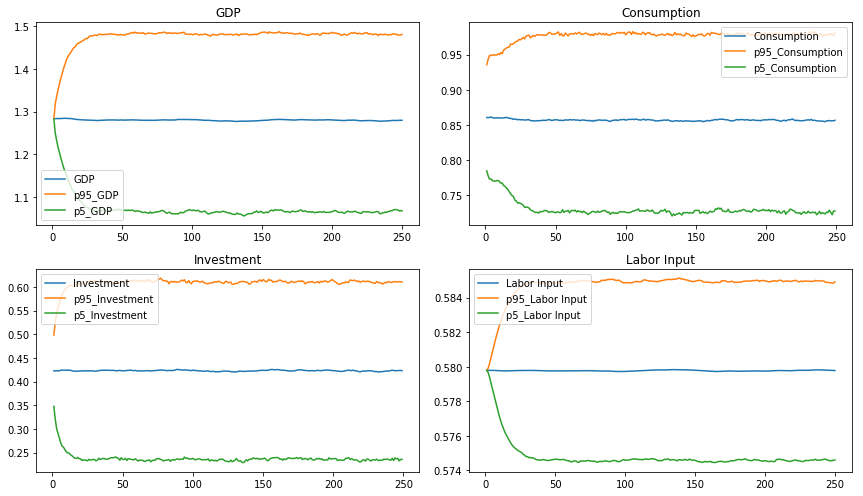

In [66]:
params = ["a", "alpha", "beta", "delta", "gamma", "rho", "sigma", "tau", "xi"]
BaselineModel = namedtuple("BaselineModel", params)
m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)


def u(m, c, l):
    uc = (c**(1.0 - m.gamma) - 1.0) / (1.0 - m.gamma)
    ul = m.a * ((1.0 - l)**(1.0 - m.xi) - 1.0) / (1.0 - m.xi)
    return uc + ul

def du_dc(m, c, l):
    return c**(-m.gamma)

def du_dl(m, c, l):
    return - m.a * (1.0 - l)**(-m.xi)

def f(m, k, l, z):
    return k**m.alpha * (l * np.exp(z))**(1.0 - m.alpha)

def df_dk(m, k, l, z):
    return m.alpha * (l/k * np.exp(z))**(1.0 - m.alpha)

def df_dl(m, k, l, z):
    return (1.0 - m.alpha) * np.exp(z)**(1.0 - m.alpha) * (k / l)**m.alpha

def Definitions(m, ktp1, kt, lt, zt):
    wt = df_dl(m, kt, lt, zt)
    rt = df_dk(m, kt, lt, zt)
    Tt = m.tau * (wt*lt + (rt - m.delta)*kt)
    ct = (1 - m.tau) * (wt*lt + (rt - m.delta)*kt) + kt + Tt - ktp1
    return ct, rt, Tt, wt

def CharacteristicEquations(m, ktp2, ltp1, ktp1, lt, kt, ltm1, ztp1, zt):
    ct, rt, Tt, wt = Definitions(m, ktp1, kt, lt, zt)
    ctp1, rtp1, Ttp1, wtp1 = Definitions(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.delta)*(1 - m.tau) + 1.0
    intertemporal_ee = du_dc(m, ct, lt) - m.beta*du_dc(m, ctp1, ltp1)*rr_tp1
    intratemporal_ee = du_dl(m, ct, lt) + du_dc(m, ct, lt)*wt*(1.0 - m.tau)
    return np.array([intertemporal_ee, intratemporal_ee])

def solve_ss(m):
    solve_me = lambda x: CharacteristicEquations(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    sol = opt.root(solve_me, np.array([0.5, 0.85]))
    return sol.x

def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)

def linearize(m, kbar, lbar, eps=1e-6):
    # Compute ss gamma
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    Gamma_ss = CharacteristicEquations(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)
    # Allocate space for derivative matrix
    neq = len(Gamma_ss)
    Dmat = np.empty((neq, 8))
    CEsplat = lambda x: CharacteristicEquations(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += eps
        Dmat[:, i] = derivative(CEsplat, x, xtilde)
    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]
    return F, G, H, L, M

kbar, lbar = solve_ss(m)
cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)
F,G,H,L,M = linearize(m, kbar, lbar, eps=1e-6)
N = m.rho
AA=np.zeros((0,2))
BB=np.zeros((0,2))
CC=np.zeros((0,0))
DD=np.zeros((0,1))
FF=F
GG=G
HH=H
JJ=np.zeros((2,0))
KK=np.zeros((2,0))
LL = L.reshape((2,1))
MM = M.reshape((2,1))
WW=np.zeros((0,0)) #empty list or floating point
TT=np.array([1e-8, 1e-8])
NN=0.9
Zbar=np.array([0])
Sylv = 0

#Use given module to solve for Uhlig matrices
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)

T =250
simsize=10000
sigma = np.sqrt(0.0004)
z_bar=0

def policy_func(T):   
    K_tilde_path = np.empty(T) 
    L_tilde_path = np.empty(T) 
    K_init = 0
    L_init = 0
    Z_init = 0
    Z_path = np.empty(T) 
    for i in range(T): 
        Z_path[i] = m.rho*Z_init + np.random.normal(0, sigma)
        Z_init = Z_path[i]
    Z_path = np.append(0, Z_path)#Size = T+1
    Z_path = Z_path[:-1]#Size = T
    K_tilde_path[0] = K_init
    L_tilde_path[0] = L_init
    X = np.array([K_init, L_init])
    for i in range(1,T): 
        K_tilde_path[i] = (PP@X)[0] + (QQ*Z_path[i])[0]
        L_tilde_path[i] = (PP@X)[1] + (QQ*Z_path[i])[1]
        X = np.array([K_tilde_path[i], L_tilde_path[i]])
    return K_tilde_path, L_tilde_path, Z_path
        
def simulation(T,simsize, kbar, lbar):
    mat_K_tilde = np.empty((simsize,T))
    mat_L_tilde = np.empty((simsize,T))
    mat_K = np.empty((simsize,T))
    mat_L = np.empty((simsize,T))
    mat_Z = np.empty((simsize,T))
    mat_C = np.empty((simsize,T-1))
    mat_I = np.empty((simsize, T-1))
    mat_GDP = np.empty((simsize, T))
    mat_Kp1 = np.empty((simsize, T-1))
    
    for i in range(simsize):
        output = policy_func(T)
        mat_K_tilde[i,:] = output[0]
        mat_L_tilde[i,:] = output[1]
        mat_Z[i,:] = output[2]
        mat_K[i,:] = kbar*(1+mat_K_tilde[i,:])
        mat_L[i,:] = lbar*(1+mat_L_tilde[i,:])
        mat_GDP[i,:] = f(m, mat_K[i,:], mat_L[i,:], mat_Z[i,:])
        mat_Kp1[i,:] = mat_K[i, 1:]
        mat_I[i,:] = mat_Kp1[i,:] - (1- m.delta)*mat_K[i, :-1]
        mat_C[i,:], r, T_1, w = Definitions(m, mat_Kp1[i,:], mat_K[i, :-1], mat_L[i, :-1], mat_Z[i, :-1])
    return mat_K, mat_L, mat_Z, mat_GDP, mat_Kp1, mat_I, mat_C
    

def averages(mat_K, mat_L, mat_Z, mat_GDP, mat_I, mat_C):
    avg_K = np.mean(mat_K, axis=0)
    avg_L = np.mean(mat_L, axis=0)
    avg_Z = np.mean(mat_Z, axis=0)
    avg_GDP = np.mean(mat_GDP, axis=0)
    avg_I = np.mean(mat_I, axis=0)
    avg_C = np.mean(mat_C, axis=0)
    p95_K = np.percentile(mat_K, 95, axis=0)
    p5_K = np.percentile(mat_K, 5, axis=0)
    p95_L = np.percentile(mat_L, 95, axis=0)
    p5_L = np.percentile(mat_L, 5, axis=0)
    p95_Z = np.percentile(mat_Z, 95, axis=0)
    p5_Z = np.percentile(mat_Z, 5, axis=0)
    p95_GDP = np.percentile(mat_GDP, 95, axis=0)
    p5_GDP = np.percentile(mat_GDP, 5, axis=0)
    p95_I = np.percentile(mat_I, 95, axis=0)
    p5_I = np.percentile(mat_I, 5, axis=0)
    p95_C = np.percentile(mat_C, 95, axis=0)
    p5_C = np.percentile(mat_C, 5, axis=0)
    return avg_K, avg_L, avg_GDP, avg_I,avg_C, p95_K, p5_K, p95_L, p5_L, p95_Z, p5_Z, p95_GDP, p5_GDP, p95_I, p5_I, p95_C, p5_C

kbar, lbar = solve_ss(m)
cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)
mat_K, mat_L, mat_Z, mat_GDP, mat_Kp1, mat_I, mat_C = simulation(T, simsize, kbar, lbar)
avg_K, avg_L, avg_GDP, avg_I,avg_C, p95_K, p5_K, p95_L, p5_L, p95_Z, p5_Z, p95_GDP, p5_GDP, p95_I, p5_I, p95_C, p5_C = averages(mat_K, mat_L, mat_Z, mat_GDP, mat_I, mat_C)
time = np.linspace(1,250,250)


plt.figure(figsize=(12, 7))
plt.subplot(221)
plt.plot(time, avg_GDP, label = 'GDP')
plt.plot(time, p95_GDP, label = 'p95_GDP')
plt.plot(time, p5_GDP, label = 'p5_GDP')
plt.title('GDP')
plt.legend()

plt.subplot(222)
plt.plot(time[:-1], avg_C, label = 'Consumption')
plt.plot(time[:-1], p95_C, label = 'p95_Consumption')
plt.plot(time[:-1], p5_C, label = 'p5_Consumption')
plt.title('Consumption')
plt.legend()

plt.subplot(223)
plt.plot(time[:-1], avg_I, label = 'Investment')
plt.plot(time[:-1], p95_I, label = 'p95_Investment')
plt.plot(time[:-1], p5_I, label = 'p5_Investment')
plt.title('Investment')
plt.legend()

plt.subplot(224)
plt.plot(time, avg_L, label = 'Labor Input')
plt.plot(time, p95_L, label = 'p95_Labor Input')
plt.plot(time, p5_L, label = 'p5_Labor Input')
plt.title('Labor Input')
plt.legend()

plt.tight_layout()
plt.show()




Problem 8

In [103]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))

print('MEANS')
print('Average value and sd GDP: ', np.mean(np.mean(mat_GDP, axis=1)), np.std(np.mean(mat_GDP, axis=1)))
print('Average value and sd Labour: ', np.mean(np.mean(mat_L, axis=1)), np.std(np.mean(mat_L, axis=1)))
print('Average value and sd Investment: ', np.mean(np.mean(mat_I, axis=1)), np.std(np.mean(mat_I, axis=1)))
print('Average value and sd Consumption: ', np.mean(np.mean(mat_C, axis=1)), np.std(np.mean(mat_C, axis=1)))

print('VOLATILITY')
print('Average value and sd GDP: ', np.mean(np.std(mat_GDP, axis=1)), np.std(np.std(mat_GDP, axis=1)))
print('Average value and sd Labour: ', np.mean(np.std(mat_L, axis=1)), np.std(np.std(mat_L, axis=1)))
print('Average value and sd Investment: ', np.mean(np.std(mat_I, axis=1)), np.std(np.std(mat_I, axis=1)))
print('Average value and sd Consumption: ', np.mean(np.std(mat_C, axis=1)), np.std(np.std(mat_C, axis=1)))

print('COEFFICIENT OF VARIATION')
print('Average value and sd GDP: ', np.mean(np.mean(mat_GDP, axis=1)/np.std(mat_GDP, axis=1)), np.std(np.mean(mat_GDP, axis=1)/np.std(mat_GDP, axis=1)))
print('Average value and sd Labour: ', np.mean(np.mean(mat_L, axis=1)/np.std(mat_L, axis=1)), np.std(np.mean(mat_L, axis=1)/np.std(mat_L, axis=1)))
print('Average value and sd Investment: ', np.mean(np.mean(mat_I, axis=1)/np.std(mat_I, axis=1)), np.std(np.mean(mat_I, axis=1)/np.std(mat_I, axis=1)))
print('Average value and sd Consumption: ', np.mean(np.mean(mat_C, axis=1)/np.std(mat_C, axis=1)), np.std(np.mean(mat_C, axis=1)/np.std(mat_C, axis=1)))


print('RELATIVE VOLATILITY')
print('Average value and sd GDP: ', np.mean(np.std(mat_GDP, axis=1)/np.std(mat_GDP, axis=1)), np.std(np.std(mat_GDP, axis=1)/np.std(mat_GDP, axis=1)))
print('Average value and sd Labour: ', np.mean(np.std(mat_L, axis=1)/np.std(mat_GDP, axis=1)), np.std(np.std(mat_L, axis=1)/np.std(mat_GDP, axis=1)))
print('Average value and sd Investment: ', np.mean(np.std(mat_I, axis=1)/np.std(mat_GDP, axis=1)), np.std(np.std(mat_I, axis=1)/np.std(mat_GDP, axis=1)))
print('Average value and sd Consumption: ', np.mean(np.std(mat_C, axis=1)/np.std(mat_GDP, axis=1)), np.std(np.std(mat_C, axis=1)/np.std(mat_GDP, axis=1)))

print('PERSISTENCE')  
auto_GDP = np.empty(simsize)
auto_Labour = np.empty(simsize)
auto_Investment = np.empty(simsize)
auto_Consumption = np.empty(simsize)
for i in range(simsize):
    auto_GDP[i]= autocorr(mat_GDP[i,:], t=1)[0,1]
    auto_Labour[i]= autocorr(mat_L[i,:], t=1)[0,1]
    auto_Investment[i]= autocorr(mat_I[i,:], t=1)[0,1]
    auto_Consumption[i]= autocorr(mat_C[i,:], t=1)[0,1]
print('Average value and sd GDP: ', np.mean(auto_GDP), np.std(auto_GDP))
print('Average value and sd Labour: ', np.mean(auto_Labour), np.std(auto_Labour))
print('Average value and sd Investment: ', np.mean(auto_Investment), np.std(auto_Investment))
print('Average value and sd Consumption: ', np.mean(auto_Consumption), np.std(auto_Consumption))

print('CYCLICALITY')
cyc_GDP = np.empty(simsize)
cyc_Labour = np.empty(simsize)
cyc_Investment = np.empty(simsize)
cyc_Consumption = np.empty(simsize)
for i in range(simsize):
    cyc_GDP[i]= np.corrcoef(mat_GDP[i,:], mat_GDP[i,:])[0,1]
    cyc_Labour[i]= np.corrcoef(mat_L[i,:], mat_GDP[i,:])[0,1]
    cyc_Investment[i]= np.corrcoef(mat_I[i,:], (mat_GDP[i,:])[:-1])[0,1]
    cyc_Consumption[i]= np.corrcoef(mat_C[i,:], (mat_GDP[i,:])[:-1])[0,1]
print('Average value and sd GDP: ', np.mean(cyc_GDP), np.std(cyc_GDP))
print('Average value and sd Labour: ', np.mean(cyc_Labour), np.std(cyc_Labour))
print('Average value and sd Investment: ', np.mean(cyc_Investment), np.std(cyc_Investment))
print('Average value and sd Consumption: ', np.mean(cyc_Consumption), np.std(cyc_Consumption))



MEANS
Average value and sd GDP:  1.280027736395411 0.048161304391010705
Average value and sd Labour:  0.5797721998475659 0.0012207138258819705
Average value and sd Investment:  0.4230501688814053 0.03347561293378781
Average value and sd Consumption:  0.8569794260133357 0.015210284209787777
VOLATILITY
Average value and sd GDP:  0.11166679106084862 0.025053629672816387
Average value and sd Labour:  0.0027255561150997727 0.0006281759935406274
Average value and sd Investment:  0.10670100303905092 0.01563012554603865
Average value and sd Consumption:  0.07318582128877499 0.008514933746109603
COEFFICIENT OF VARIATION
Average value and sd GDP:  12.060848947135787 2.828405825887142
Average value and sd Labour:  224.38790615566327 53.302870101294246
Average value and sd Investment:  4.049293105093566 0.6718934032766571
Average value and sd Consumption:  11.871200093482706 1.4200924626164462
RELATIVE VOLATILITY
Average value and sd GDP:  1.0 0.0
Average value and sd Labour:  0.024380888377775148

Problem 9

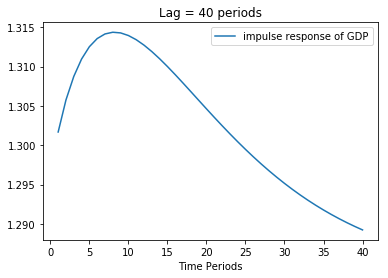

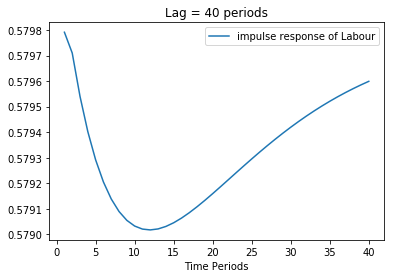

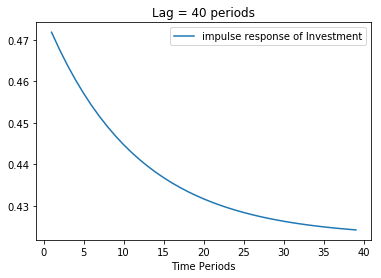

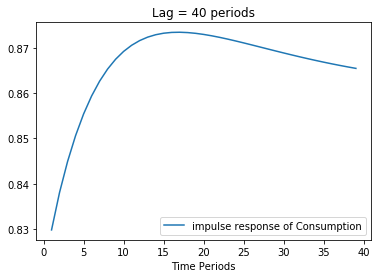

In [137]:
lag = 40

def policy_func(lag):   
    K_tilde_path = np.empty(lag) 
    L_tilde_path = np.empty(lag) 
    K_init = 0
    L_init = 0
    Z_init = 0 + np.random.normal(0, sigma)
    Z_path = np.empty(lag)
    Z_path[0] = Z_init
    for i in range(1,lag): 
        Z_path[i] = m.rho*Z_init
        Z_init = Z_path[i]
    K_tilde_path[0] = K_init
    L_tilde_path[0] = L_init
    X = np.array([K_init, L_init])
    for i in range(1,lag): 
        K_tilde_path[i] = (PP@X)[0] + (QQ*Z_path[i])[0]
        L_tilde_path[i] = (PP@X)[1] + (QQ*Z_path[i])[1]
        X = np.array([K_tilde_path[i], L_tilde_path[i]])
    K_path = kbar*(1+K_tilde_path)
    L_path = lbar*(1+L_tilde_path)
    return K_path, L_path, Z_path

K_path, L_path, Z_path = policy_func(lag)
GDP_path = f(m, K_path, L_path, Z_path)
Kp1 = K_path[1:]
I_path = Kp1 - (1- m.delta)*K_path[:-1]
C_path, r, T_1, w = Definitions(m, Kp1, K_path[:-1], L_path[:-1], Z_path[:-1])


time = np.linspace(1,lag,lag)
plt.plot(time, GDP_path, label='impulse response of GDP')
plt.legend()
plt.xlabel('Time Periods')
plt.title('Lag = 40 periods')
plt.show()

plt.plot(time, L_path, label='impulse response of Labour')
plt.xlabel('Time Periods')
plt.title('Lag = 40 periods')
plt.legend()
plt.show()

plt.plot(time[:-1], I_path, label='impulse response of Investment')
plt.xlabel('Time Periods')
plt.title('Lag = 40 periods')
plt.legend()
plt.show()

plt.plot(time[:-1], C_path, label='impulse response of Consumption')
plt.xlabel('Time Periods')
plt.title('Lag = 40 periods')
plt.legend()
plt.show()      

Problem 10

Problem 11

# Chapter 3 - Perturbation

Problem 1